# GEFS

This notebook demonstrates using the Global Ensemble Forecast System. It is available on [AWS](https://registry.opendata.aws/noaa-gefs/) for 2017 to present.

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

from herbie import Herbie
from paint.standard2 import cm_tmp, cm_wind, cm_wave_height, cm_pcp
from toolbox import EasyMap, pc

The GEFS model product could be any of the following:
- `'atmos.5'` - Half degree atmos PRIMARY fields (pgrb2ap5); ~83 most common variables.
- `'atmos.5b'` - Half degree atmos SECONDARY fields (pgrb2bp5); ~500 least common variables
- `'atmos.25'` - Quarter degree atmos PRIMARY fields (pgrb2sp25); ~35 most common variables
- `'wave'` - Global wave products.
- `'chem.5'` - Chemistry fields on 0.5 degree grid
- `'chem.25'` - Chemistry fields on 0.25 degree grid

You also must specify a `member`. For the atmos output, this should be something like `0` or `"c00"` for control member, `1`-`30` or `"p01"`-`"p30"` for members 1-30, or `'avg'` or `'mean'` for the ensemble mean, `'spr'` for ensemble spread.

In [2]:
H = Herbie(
    "2023-01-04 12:00",
    model="gefs",
    product="atmos.5",
    member="mean",
)
H

✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2023-Jan-04 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


▌▌Herbie GEFS model atmos.5 product initialized 2023-Jan-04 12:00 UTC F00 ┊ source=aws

In [3]:
# Show all the available products (from the model template file)
H.PRODUCTS

{'atmos.5': 'Half degree atmos PRIMARY fields (pgrb2ap5); ~83 most common variables.',
 'atmos.5b': 'Half degree atmos SECONDARY fields (pgrb2bp5); ~500 least common variables',
 'atmos.25': 'Quarter degree atmos PRIMARY fields (pgrb2sp25); ~35 most common variables',
 'wave': 'Global wave products.',
 'chem.5': 'Chemistry fields on 0.5 degree grid',
 'chem.25': 'Chemistry fields on 0.25 degree grid'}

In [4]:
df = H.inventory()
df

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,search_this
0,1,0,224944,0-224944,2023-01-04 12:00:00,2023-01-04 12:00:00,HGT,10 mb,anl,ens mean,:HGT:10 mb:anl:ens mean
1,2,224944,353986,224944-353986,2023-01-04 12:00:00,2023-01-04 12:00:00,TMP,10 mb,anl,ens mean,:TMP:10 mb:anl:ens mean
2,3,353986,387271,353986-387271,2023-01-04 12:00:00,2023-01-04 12:00:00,RH,10 mb,anl,ens mean,:RH:10 mb:anl:ens mean
3,4,387271,641627,387271-641627,2023-01-04 12:00:00,2023-01-04 12:00:00,UGRD,10 mb,anl,ens mean,:UGRD:10 mb:anl:ens mean
4,5,641627,881486,641627-881486,2023-01-04 12:00:00,2023-01-04 12:00:00,VGRD,10 mb,anl,ens mean,:VGRD:10 mb:anl:ens mean
...,...,...,...,...,...,...,...,...,...,...,...
66,67,13100932,13361479,13100932-13361479,2023-01-04 12:00:00,2023-01-04 12:00:00,VGRD,10 m above ground,anl,ens mean,:VGRD:10 m above ground:anl:ens mean
67,68,13361479,13520800,13361479-13520800,2023-01-04 12:00:00,2023-01-04 12:00:00,PWAT,entire atmosphere (considered as a single layer),anl,ens mean,:PWAT:entire atmosphere (considered as a singl...
68,69,13520800,13665977,13520800-13665977,2023-01-04 12:00:00,2023-01-04 12:00:00,CAPE,180-0 mb above ground,anl,ens mean,:CAPE:180-0 mb above ground:anl:ens mean
69,70,13665977,13762089,13665977-13762089,2023-01-04 12:00:00,2023-01-04 12:00:00,CIN,180-0 mb above ground,anl,ens mean,:CIN:180-0 mb above ground:anl:ens mean


In [5]:
df.variable.unique()

array(['HGT', 'TMP', 'RH', 'UGRD', 'VGRD', 'VVEL', 'PRES', 'TSOIL',
       'SOILW', 'WEASD', 'SNOD', 'ICETK', 'PWAT', 'CAPE', 'CIN', 'PRMSL'],
      dtype=object)

In [21]:
H.inventory("HGT")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,search_this
0,1,0,224944,0-224944,2023-01-04 12:00:00,2023-01-04 12:00:00,HGT,10 mb,anl,ens mean,:HGT:10 mb:anl:ens mean
5,6,881486,1113634,881486-1113634,2023-01-04 12:00:00,2023-01-04 12:00:00,HGT,50 mb,anl,ens mean,:HGT:50 mb:anl:ens mean
10,11,1829912,2058354,1829912-2058354,2023-01-04 12:00:00,2023-01-04 12:00:00,HGT,100 mb,anl,ens mean,:HGT:100 mb:anl:ens mean
15,16,2853920,3078454,2853920-3078454,2023-01-04 12:00:00,2023-01-04 12:00:00,HGT,200 mb,anl,ens mean,:HGT:200 mb:anl:ens mean
20,21,3750171,3972303,3750171-3972303,2023-01-04 12:00:00,2023-01-04 12:00:00,HGT,250 mb,anl,ens mean,:HGT:250 mb:anl:ens mean
25,26,4665076,4885223,4665076-4885223,2023-01-04 12:00:00,2023-01-04 12:00:00,HGT,300 mb,anl,ens mean,:HGT:300 mb:anl:ens mean
30,31,5575673,5819613,5575673-5819613,2023-01-04 12:00:00,2023-01-04 12:00:00,HGT,500 mb,anl,ens mean,:HGT:500 mb:anl:ens mean
35,36,6505417,6760483,6505417-6760483,2023-01-04 12:00:00,2023-01-04 12:00:00,HGT,700 mb,anl,ens mean,:HGT:700 mb:anl:ens mean
40,41,7642597,7908462,7642597-7908462,2023-01-04 12:00:00,2023-01-04 12:00:00,HGT,850 mb,anl,ens mean,:HGT:850 mb:anl:ens mean
46,47,9144964,9419015,9144964-9419015,2023-01-04 12:00:00,2023-01-04 12:00:00,HGT,925 mb,anl,ens mean,:HGT:925 mb:anl:ens mean


In [7]:
ds = H.xarray("PWAT")
ds

<xarray.Dataset>
Dimensions:                (latitude: 361, longitude: 720)
Coordinates:
    time                   datetime64[ns] 2023-01-04T12:00:00
    step                   timedelta64[ns] 00:00:00
    atmosphereSingleLayer  float64 0.0
  * latitude               (latitude) float64 90.0 89.5 89.0 ... -89.5 -90.0
  * longitude              (longitude) float64 0.0 0.5 1.0 ... 358.5 359.0 359.5
    valid_time             datetime64[ns] 2023-01-04T12:00:00
Data variables:
    pwat                   (latitude, longitude) float32 4.3 4.3 4.3 ... 1.0 1.0
    gribfile_projection    object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   gefs
    product:                 atmos.5
    description:             Global Ensemble Forecast System (GEFS)
    remote_grib:             https://noaa-gefs-pds.s3.amazonaws.com/gefs.2023...
    local_grib:              /home/blaylock/data/gefs/20230104/subset_f4ef1a3...
    search:            PWAT

In [8]:
ds2 = H.xarray("HGT:500 mb")
ds2

<xarray.Dataset>
Dimensions:              (latitude: 361, longitude: 720)
Coordinates:
    time                 datetime64[ns] 2023-01-04T12:00:00
    step                 timedelta64[ns] 00:00:00
    isobaricInhPa        float64 500.0
  * latitude             (latitude) float64 90.0 89.5 89.0 ... -89.0 -89.5 -90.0
  * longitude            (longitude) float64 0.0 0.5 1.0 ... 358.5 359.0 359.5
    valid_time           datetime64[ns] 2023-01-04T12:00:00
Data variables:
    gh                   (latitude, longitude) float32 5.248e+03 ... 5.023e+03
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   gefs
    product:                 atmos.5
    description:             Global Ensemble Forecast System (GEFS)
    remote_grib:             https://noaa-gefs-pds.s3.amazonaws.com/gefs.2023...
    local_grib:              /home/blaylock/data/gefs/20230104/subset_f4efbd3...
    search:            HGT:500 mb

Text(1.0, 1.0, 'Precipitable water')

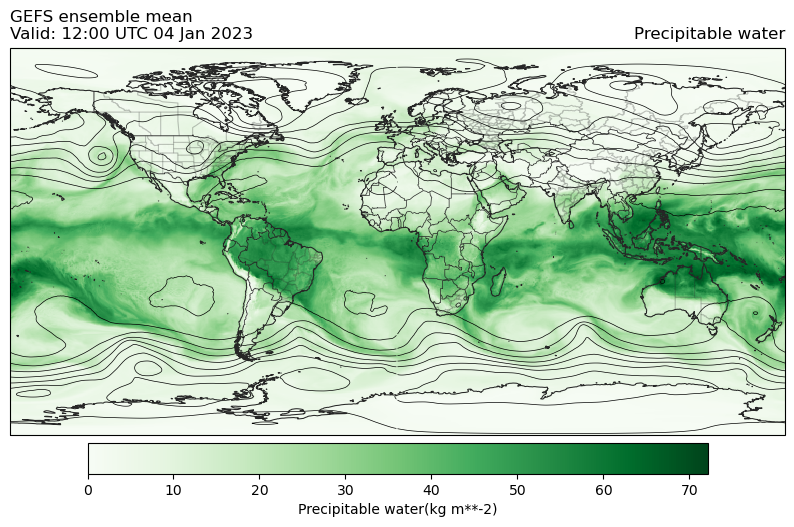

In [9]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.pwat, transform=pc, cmap="Greens", vmin=0
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    label=f"{ds.pwat.GRIB_name}({ds.pwat.GRIB_units})",
)

# Add 500 hPa Geopotential height
ax.contour(
    ds2.longitude,
    ds2.latitude,
    ds2.gh,
    colors="k",
    linewidths=0.5,
    levels=range(0, 10000, 120),
)

ax.set_title(
    f"{ds.model.upper()} ensemble mean\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.pwat.GRIB_name, loc="right")

In [15]:
# Get a specific member
H5 = Herbie(
    "2022-01-01",
    model="gefs",
    product="atmos.5",
    member=5,
)
H5.xarray("TMP:2 m")

## If a user wants all the members in
## a single Dataframe, I'll let the user
## concat it themselves.

✅ Found ┊ model=gefs ┊ product=atmos.5 ┊ 2022-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


<xarray.Dataset>
Dimensions:              (latitude: 361, longitude: 720)
Coordinates:
    number               int64 5
    time                 datetime64[ns] 2022-01-01
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 90.0 89.5 89.0 ... -89.0 -89.5 -90.0
  * longitude            (longitude) float64 0.0 0.5 1.0 ... 358.5 359.0 359.5
    valid_time           datetime64[ns] 2022-01-01
Data variables:
    t2m                  (latitude, longitude) float32 244.5 244.5 ... 252.3
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   gefs
    product:                 atmos.5
    description:             Global Ensemble Forecast System (GEFS)
    remote_grib:             https://noaa-gefs-pds.s3.amazonaws.com/gefs.2022...
    local_grib:              /home/blaylock/data/gefs/20220101/subset_04ef8ac...
    search:            TMP:2 m

# GEFS-Reanalysis Data

This section demonstrates using the Global Ensemble Forecast System (GEFS) reanalysis: 2000-2019 dataset.

The GEFS version 12 reanalysis is available on [Amazon Web Services ](https://registry.opendata.aws/noaa-gefs-reforecast/) and can be retrieved with Herbie.

> Note: The GEFS directory structure is different than other models that Herbie can access, and that makes Herbie's access to these files little awkward. Instead of grouping the GRIB fields by forecast hour where there are many different variables for the same lead time in the same file, the GEFS files are grouped into the same variable per file with each GRIB message being a different lead time. This changes the way a user would use Herbie to access GEFS data--a user will need to supply a "variable_level" argument to access a full file. For subsetting by specific grib messages, you will use the "search" argument to key in on the message of interest. You will still need to give a value for "fxx" to tell Herbie which directory to look for. 

Yeah, it's a little different paradigm for Herbie, but we can work with it. It may be nice to write a `herbie.tool` to help make calls to Herbie a little more simple (like a custom bulk_download script)

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

from herbie import Herbie
from paint.standard2 import cm_tmp, cm_wind, cm_wave_height
from toolbox import EasyMap, pc

## Retrieve a full file
Download a full GRIB2 file to your local system.

Remember to specify the following:
- `fxx` is the lead time lead time, a number between 0 and 384. If you are getting the full file, this only tells Herbie what folder to look in (Days:0-10 or Days:10-16). 
- `member` is the ensemble member. 0 is the control and a value between 1, 2, 3, or 4 is a perturbation member.
- `variable_level` is the name of the file to obtain.


In [16]:
H = Herbie(
    "2017-03-14", model="gefs_reforecast", fxx=12, member=0, variable_level="tmp_2m"
)
H.download(verbose=True)

✅ Found ┊ model=gefs_reforecast ┊ product=GEFSv12/reforecast ┊ 2017-Mar-14 00:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/home/blaylock/data/gefs_reforecast/20170314]
✅ Success! Downloaded GEFS_REFORECAST from aws                 
	src: /home/blaylock/data/gefs_reforecast/20170314/tmp_2m_2017031400_c00.grib2
	dst: /home/blaylock/data/gefs_reforecast/20170314/tmp_2m_2017031400_c00.grib2


PosixPath('/home/blaylock/data/gefs_reforecast/20170314/tmp_2m_2017031400_c00.grib2')

## Download/Retrieve a subset

Subsetting uses the `search` argument to parse out information from the GRIB2's index file. Since the variables of each message in a file are all the same, we need to set the `search` to key in on the lead time we are interested in.

Look at the index file to see how to key in on a specific GRIB message.

In [ ]:
# Look at the search_this column of the index DataFrame
H.inventory().search_this

grib_message
1.0     :TMP:2 m above ground:3 hour fcst:ENS=low-res ctl
2.0     :TMP:2 m above ground:6 hour fcst:ENS=low-res ctl
3.0     :TMP:2 m above ground:9 hour fcst:ENS=low-res ctl
4.0     :TMP:2 m above ground:12 hour fcst:ENS=low-res...
5.0     :TMP:2 m above ground:15 hour fcst:ENS=low-res...
                              ...                        
76.0    :TMP:2 m above ground:228 hour fcst:ENS=low-re...
77.0    :TMP:2 m above ground:231 hour fcst:ENS=low-re...
78.0    :TMP:2 m above ground:234 hour fcst:ENS=low-re...
79.0    :TMP:2 m above ground:237 hour fcst:ENS=low-re...
80.0    :TMP:2 m above ground:240 hour fcst:ENS=low-re...
Name: search_this, Length: 80, dtype: object

In [ ]:
# Get the 15-h forecast
ds = H.xarray(":15 hour fcst:")

In [ ]:
ds

<xarray.Dataset>
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    number               int32 0
    time                 datetime64[ns] 2017-03-14
    step                 timedelta64[ns] 15:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time           datetime64[ns] ...
Data variables:
    t2m                  (latitude, longitude) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   gefs
    product:                 GEFSv12/reforecast
    description:             Global Ensemble Forecast System (GEFS)
    remote_grib:             C:\Users\blayl_depgywe\data\gefs\20170314\tmp_2m...
    local_grib:              C:\Users\blayl_depgywe\data\gefs\20170314\tmp_2m...
    search:            :15 hour fcst:

C:\Users\blayl_depgywe\miniconda3\envs\herbie\lib\site-packages\metpy\xarray.py:353: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


Text(1.0, 1.0, '2 metre temperature')

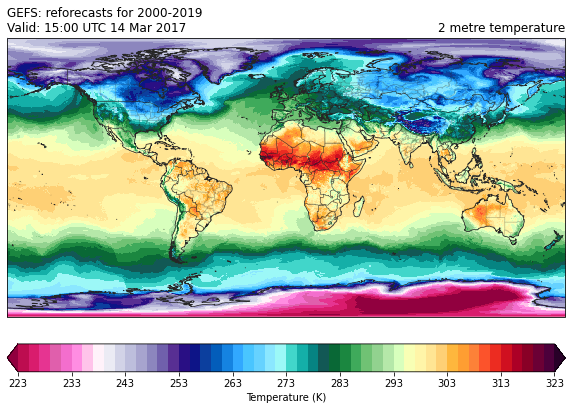

In [ ]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.t2m.GRIB_name, loc="right")

## What are valid values for `variable_level`?
You need to look at the file structure within the GEFS bucket to know what is avaialble. We can use s3fs to tell us what we can use for our `variable_level` argument.

In [7]:
import s3fs
import pandas as pd

In [8]:
# List files in the GEFS bucket for a day
fs = s3fs.S3FileSystem(anon=True)
files = fs.ls(
    path="noaa-gefs-retrospective/GEFSv12/reforecast/2015/2015010100/c00/Days:1-10"
)

In [9]:
# var_lev prefix
var_lev = [i.split("/")[-1].split("_") for i in files if i.endswith(".grib2")]

In [10]:
variable_levels_df = pd.DataFrame(var_lev, columns=["variable", "level", "a", "b", "c"])
variable_levels_df

,variable,level,a,b,c
0,acpcp,sfc,2015010100,c00.grib2,None
1,apcp,sfc,2015010100,c00.grib2,None
2,cape,sfc,2015010100,c00.grib2,None
3,cin,sfc,2015010100,c00.grib2,None
4,dlwrf,sfc,2015010100,c00.grib2,None
5,dswrf,sfc,2015010100,c00.grib2,None
6,gflux,sfc,2015010100,c00.grib2,None
7,gust,sfc,2015010100,c00.grib2,None
8,hgt,ceiling,2015010100,c00.grib2,None
9,hgt,hybr,2015010100,c00.grib2,None


In [11]:
# These are the available variables
variable_levels_df.variable.unique()

array(['acpcp', 'apcp', 'cape', 'cin', 'dlwrf', 'dswrf', 'gflux', 'gust',
       'hgt', 'hlcy', 'lhtfl', 'ncpcp', 'pbl', 'pres', 'pvort', 'pwat',
       'rh', 'sfcr', 'shtfl', 'soilw', 'spfh', 'tcdc', 'tmax', 'tmin',
       'tmp', 'tozne', 'tsoil', 'uflx', 'ugrd', 'ulwrf', 'uswrf', 'vflx',
       'vgrd', 'vvel', 'watr', 'weasd'], dtype=object)

In [12]:
# These are the available levels
variable_levels_df.level.unique()

array(['sfc', 'ceiling', 'hybr', 'pres', 'hgt', 'msl', 'pvor', 'isen',
       'eatm', 'bgrnd', '2m', 'tatm'], dtype=object)